In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
url="https://www.imdb.com/chart/top/?ref_=nv_mv_250"
r=requests.get(url)

In [3]:
html=r.text
soup=BeautifulSoup(html,"html.parser")

In [4]:
print(soup.title.text)

IMDb Top 250 - IMDb


In [5]:
data=soup.find_all('tbody',{"class":"lister-list"})

In [7]:
table_body=soup.find('tbody')
table_rows=table_body.find_all("tr")



In [8]:
Rank=[]
Title=[]
Rating=[]
for tr in table_rows:
    td=tr.find_all('td')
    Rank.append(td[0].text)
    Title.append(td[1].text)
    Rating.append(td[2].text)
    
    

headers=["Rank","Title","Rating"]

In [9]:
df=pd.DataFrame(list(zip(Rank,Title,Rating)),columns=headers)

In [10]:
rate=df.Rating.astype("string")
df["new_Rating"]=rate
df.head()

,Rank,Title,Rating,new_Rating
0,\n\n\n\n\n\n \n,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,9.2
1,\n\n\n\n\n\n \n,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,9.1
2,\n\n\n\n\n\n \n,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,9.0
3,\n\n\n\n\n\n \n,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,9.0
4,\n\n\n\n\n\n \n,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,8.9


In [11]:
Title=df.Title.astype("string")
df["new_Title"]=Title
df.head()

,Rank,Title,Rating,new_Rating,new_Title
0,\n\n\n\n\n\n \n,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,9.2,1. The Shawshank Redemption (1994)
1,\n\n\n\n\n\n \n,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,9.1,2. The Godfather (1972)
2,\n\n\n\n\n\n \n,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,9.0,3. The Godfather: Part II (1974)
3,\n\n\n\n\n\n \n,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,9.0,4. The Dark Knight (2008)
4,\n\n\n\n\n\n \n,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,8.9,5. 12 Angry Men (1957)


In [12]:
df=df.drop(["Rank","Title","Rating"],axis=1)


In [13]:
x=[]
for i in range(0,250):
    x.append(i)
    

In [14]:
df["Rank"]=x
len(df)
len(x)

250

In [15]:
df['new_Title'] = df['new_Title'].str.replace('\d+', '')



In [16]:
df['new_Title'] = df['new_Title'].str.replace('\.', '')
df.head()

,new_Rating,new_Title,Rank
0,9.2,The Shawshank Redemption (),0
1,9.1,The Godfather (),1
2,9.0,The Godfather: Part II (),2
3,9.0,The Dark Knight (),3
4,8.9,Angry Men (),4


In [17]:
df['new_Title'] = df['new_Title'].str.replace(r"\s*\([^()]*\)","").str.strip()

In [18]:
import seaborn as sns

In [19]:
df.head()

,new_Rating,new_Title,Rank
0,9.2,The Shawshank Redemption,0
1,9.1,The Godfather,1
2,9.0,The Godfather: Part II,2
3,9.0,The Dark Knight,3
4,8.9,Angry Men,4


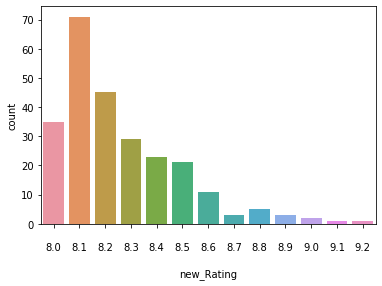

In [20]:
sns.countplot(df["new_Rating"])

In [21]:
df.head()

,new_Rating,new_Title,Rank
0,9.2,The Shawshank Redemption,0
1,9.1,The Godfather,1
2,9.0,The Godfather: Part II,2
3,9.0,The Dark Knight,3
4,8.9,Angry Men,4


In [22]:
column_names=['Rank','new_Title','new_Rating']
df = df.reindex(columns=column_names)

In [24]:
df["new_Rating"]=df.new_Rating.astype("float64")

In [25]:
df.to_csv("imdb.csv",  encoding='utf-8')